### Projeto Integrador IV  
#### Arquitetura de Redes Neurais Long Short Term Memory (LSTM) para previsão de volume do Sistema Cantareira

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import torch
import seaborn as sns
import torch.optim as optim
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import SGD, Adam
from sklearn.metrics import accuracy_score, classification_report, RocCurveDisplay
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [6]:
# Semente (seed) para a geração de números aleatórios e obter resultados reproduzíveis em diferentes execuções do código
tf.random.set_seed(1234)
print(tf.random.uniform([1], seed=1))  #'A1'
print(tf.random.uniform([1], seed=1))  #'A2'

tf.Tensor([0.1689806], shape=(1,), dtype=float32)
tf.Tensor([0.7539084], shape=(1,), dtype=float32)


In [4]:
# Utilizar recursos da GPU, caso haja.
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"{device}" " is available.")

cuda is available.


In [8]:
df_SABESP = pd.read_excel(
    r'https://github.com/GMerencio/previsao-sistema-cantareira/raw/main/SABESP-sistemas_produtores.xlsx')

dfSabesp = df_SABESP.groupby(['Data'], as_index=False).sum(numeric_only=True)

df1 = pd.DataFrame()
#df1['ds'] = dfSabesp['Data']
df1['y'] = dfSabesp['Volume (hm³)']

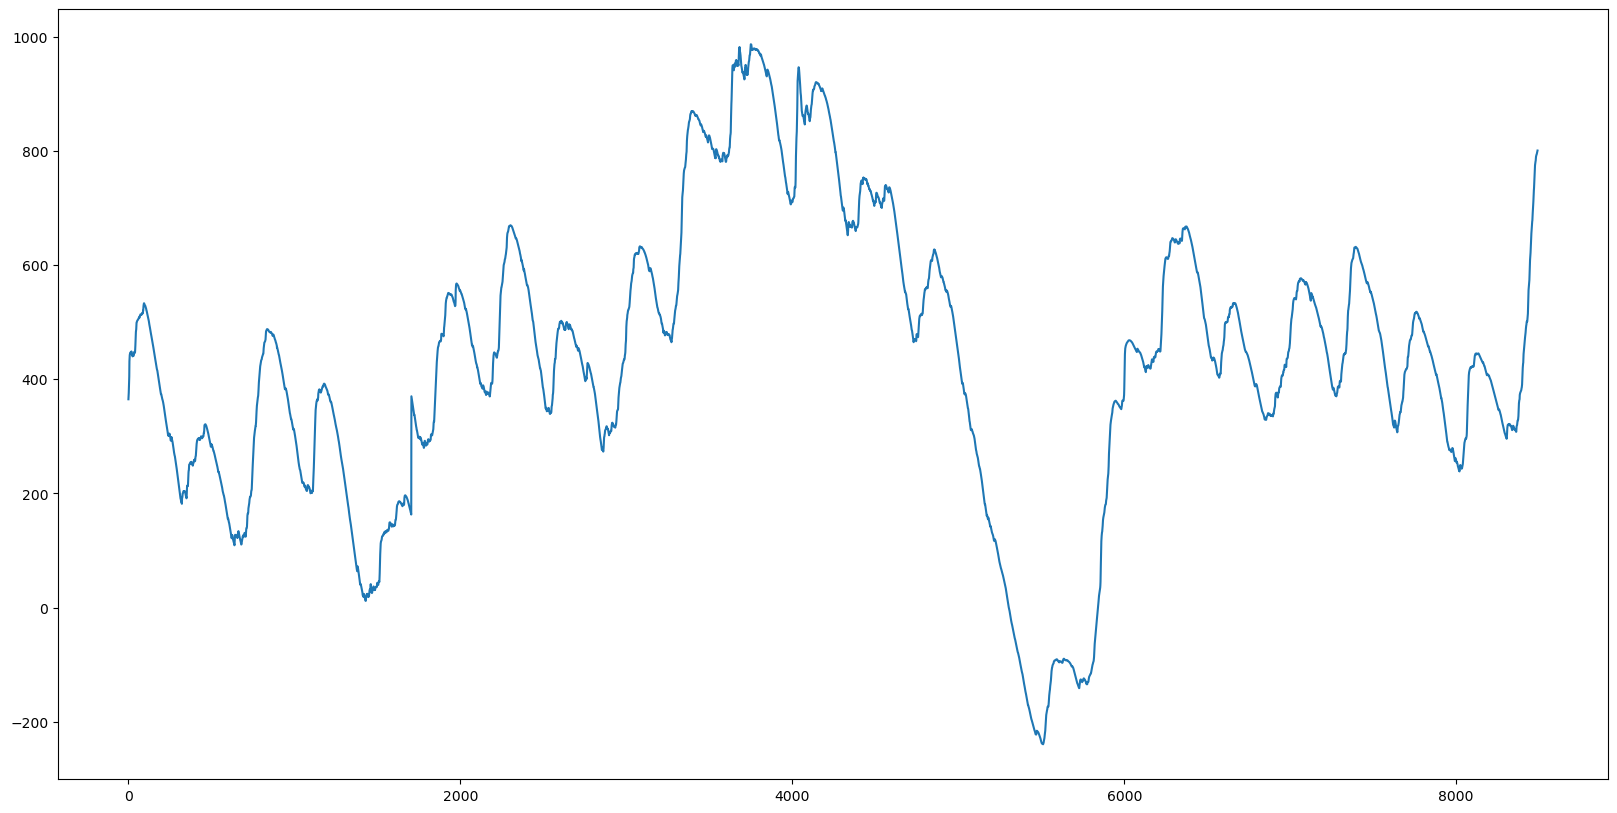

In [9]:
dataset = df1.values
dataset = dataset.astype('float64')
plt.figure(figsize=(20,10))
plt.plot(dataset)
plt.show()

#fig = plt.subplots(figsize=(18, 9))
#sns.lineplot(x='ds', y='y', data=df1).set(title='Volume [hm³] do sistema Cantareira', xlabel='Data', ylabel='Volume (hm³)')
#sns.set_theme(context='notebook', style='white', palette='deep', font='sans-serif', font_scale=1.5, color_codes=True, rc=None)

# Modelo Preditivo (LSTM)

In [10]:
# normalização do dataset
scaler = MinMaxScaler(feature_range=(-1, 1))
dataset = scaler.fit_transform(dataset)

In [30]:
# Separar o conjuntos de dados de treinamento e teste para modelagem.
train_size = int(len(dataset) * 0.9)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

7641 850


In [31]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [32]:
# reshape into X=t and Y=t+1
look_back = 800
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [33]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [34]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
opt = SGD(learning_rate=0.01)
model.compile(loss='mean_squared_error', optimizer=opt)
history = model.fit(trainX, trainY, epochs=500, batch_size=2, verbose=2, validation_split=0.3)

Epoch 1/500


2023-05-25 14:18:18.575769: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-25 14:18:18.577346: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-25 14:18:18.578356: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2394/2394 - 7s - loss: 0.0067 - val_loss: 0.0196 - 7s/epoch - 3ms/step
Epoch 2/500
2394/2394 - 5s - loss: 0.0021 - val_loss: 0.0253 - 5s/epoch - 2ms/step
Epoch 3/500
2394/2394 - 5s - loss: 0.0016 - val_loss: 0.0184 - 5s/epoch - 2ms/step
Epoch 4/500
2394/2394 - 5s - loss: 0.0013 - val_loss: 0.0170 - 5s/epoch - 2ms/step
Epoch 5/500
2394/2394 - 5s - loss: 0.0011 - val_loss: 0.0121 - 5s/epoch - 2ms/step
Epoch 6/500
2394/2394 - 5s - loss: 0.0010 - val_loss: 0.0125 - 5s/epoch - 2ms/step
Epoch 7/500
2394/2394 - 5s - loss: 8.8655e-04 - val_loss: 0.0108 - 5s/epoch - 2ms/step
Epoch 8/500
2394/2394 - 5s - loss: 8.3870e-04 - val_loss: 0.0098 - 5s/epoch - 2ms/step
Epoch 9/500
2394/2394 - 5s - loss: 7.7812e-04 - val_loss: 0.0118 - 5s/epoch - 2ms/step
Epoch 10/500
2394/2394 - 5s - loss: 7.2713e-04 - val_loss: 0.0202 - 5s/epoch - 2ms/step
Epoch 11/500
2394/2394 - 5s - loss: 6.8115e-04 - val_loss: 0.0104 - 5s/epoch - 2ms/step
Epoch 12/500
2394/2394 - 5s - loss: 6.4261e-04 - val_loss: 0.0095 - 5s/epoch 

Epoch 95/500
2394/2394 - 5s - loss: 1.6517e-04 - val_loss: 0.0095 - 5s/epoch - 2ms/step
Epoch 96/500
2394/2394 - 5s - loss: 1.6071e-04 - val_loss: 0.0100 - 5s/epoch - 2ms/step
Epoch 97/500
2394/2394 - 5s - loss: 1.6120e-04 - val_loss: 0.0088 - 5s/epoch - 2ms/step
Epoch 98/500
2394/2394 - 5s - loss: 1.5726e-04 - val_loss: 0.0092 - 5s/epoch - 2ms/step
Epoch 99/500
2394/2394 - 5s - loss: 1.5751e-04 - val_loss: 0.0093 - 5s/epoch - 2ms/step
Epoch 100/500
2394/2394 - 5s - loss: 1.5662e-04 - val_loss: 0.0091 - 5s/epoch - 2ms/step
Epoch 101/500
2394/2394 - 5s - loss: 1.5387e-04 - val_loss: 0.0092 - 5s/epoch - 2ms/step
Epoch 102/500
2394/2394 - 5s - loss: 1.5742e-04 - val_loss: 0.0093 - 5s/epoch - 2ms/step
Epoch 103/500
2394/2394 - 5s - loss: 1.5245e-04 - val_loss: 0.0105 - 5s/epoch - 2ms/step
Epoch 104/500
2394/2394 - 5s - loss: 1.5755e-04 - val_loss: 0.0094 - 5s/epoch - 2ms/step
Epoch 105/500
2394/2394 - 5s - loss: 1.5050e-04 - val_loss: 0.0091 - 5s/epoch - 2ms/step
Epoch 106/500
2394/2394 - 

2394/2394 - 5s - loss: 1.0793e-04 - val_loss: 0.0106 - 5s/epoch - 2ms/step
Epoch 188/500
2394/2394 - 5s - loss: 1.0825e-04 - val_loss: 0.0100 - 5s/epoch - 2ms/step
Epoch 189/500
2394/2394 - 5s - loss: 1.1196e-04 - val_loss: 0.0095 - 5s/epoch - 2ms/step
Epoch 190/500
2394/2394 - 5s - loss: 1.0918e-04 - val_loss: 0.0098 - 5s/epoch - 2ms/step
Epoch 191/500
2394/2394 - 6s - loss: 1.0760e-04 - val_loss: 0.0091 - 6s/epoch - 2ms/step
Epoch 192/500
2394/2394 - 6s - loss: 1.0889e-04 - val_loss: 0.0102 - 6s/epoch - 2ms/step
Epoch 193/500
2394/2394 - 5s - loss: 1.0814e-04 - val_loss: 0.0095 - 5s/epoch - 2ms/step
Epoch 194/500
2394/2394 - 5s - loss: 1.0558e-04 - val_loss: 0.0099 - 5s/epoch - 2ms/step
Epoch 195/500
2394/2394 - 5s - loss: 1.0681e-04 - val_loss: 0.0084 - 5s/epoch - 2ms/step
Epoch 196/500
2394/2394 - 5s - loss: 1.0781e-04 - val_loss: 0.0089 - 5s/epoch - 2ms/step
Epoch 197/500
2394/2394 - 6s - loss: 1.0807e-04 - val_loss: 0.0093 - 6s/epoch - 3ms/step
Epoch 198/500
2394/2394 - 5s - loss

Epoch 280/500
2394/2394 - 5s - loss: 8.8325e-05 - val_loss: 0.0091 - 5s/epoch - 2ms/step
Epoch 281/500
2394/2394 - 5s - loss: 8.7861e-05 - val_loss: 0.0103 - 5s/epoch - 2ms/step
Epoch 282/500
2394/2394 - 5s - loss: 8.9547e-05 - val_loss: 0.0097 - 5s/epoch - 2ms/step
Epoch 283/500
2394/2394 - 5s - loss: 8.7350e-05 - val_loss: 0.0102 - 5s/epoch - 2ms/step
Epoch 284/500
2394/2394 - 5s - loss: 9.0758e-05 - val_loss: 0.0100 - 5s/epoch - 2ms/step
Epoch 285/500
2394/2394 - 5s - loss: 8.7823e-05 - val_loss: 0.0092 - 5s/epoch - 2ms/step
Epoch 286/500
2394/2394 - 5s - loss: 8.7346e-05 - val_loss: 0.0098 - 5s/epoch - 2ms/step
Epoch 287/500
2394/2394 - 5s - loss: 8.9959e-05 - val_loss: 0.0096 - 5s/epoch - 2ms/step
Epoch 288/500
2394/2394 - 5s - loss: 8.7428e-05 - val_loss: 0.0094 - 5s/epoch - 2ms/step
Epoch 289/500
2394/2394 - 5s - loss: 8.6980e-05 - val_loss: 0.0092 - 5s/epoch - 2ms/step
Epoch 290/500
2394/2394 - 5s - loss: 8.6821e-05 - val_loss: 0.0096 - 5s/epoch - 2ms/step
Epoch 291/500
2394/23

2394/2394 - 5s - loss: 7.7483e-05 - val_loss: 0.0097 - 5s/epoch - 2ms/step
Epoch 373/500
2394/2394 - 5s - loss: 7.5165e-05 - val_loss: 0.0095 - 5s/epoch - 2ms/step
Epoch 374/500
2394/2394 - 5s - loss: 7.6710e-05 - val_loss: 0.0100 - 5s/epoch - 2ms/step
Epoch 375/500
2394/2394 - 5s - loss: 7.7398e-05 - val_loss: 0.0093 - 5s/epoch - 2ms/step
Epoch 376/500
2394/2394 - 5s - loss: 7.6148e-05 - val_loss: 0.0119 - 5s/epoch - 2ms/step
Epoch 377/500
2394/2394 - 5s - loss: 7.6600e-05 - val_loss: 0.0093 - 5s/epoch - 2ms/step
Epoch 378/500
2394/2394 - 5s - loss: 7.5924e-05 - val_loss: 0.0099 - 5s/epoch - 2ms/step
Epoch 379/500
2394/2394 - 5s - loss: 7.5492e-05 - val_loss: 0.0090 - 5s/epoch - 2ms/step
Epoch 380/500
2394/2394 - 5s - loss: 7.7092e-05 - val_loss: 0.0104 - 5s/epoch - 2ms/step
Epoch 381/500
2394/2394 - 5s - loss: 7.6584e-05 - val_loss: 0.0108 - 5s/epoch - 2ms/step
Epoch 382/500
2394/2394 - 5s - loss: 7.5553e-05 - val_loss: 0.0099 - 5s/epoch - 2ms/step
Epoch 383/500
2394/2394 - 5s - loss

Epoch 465/500
2394/2394 - 5s - loss: 6.9878e-05 - val_loss: 0.0100 - 5s/epoch - 2ms/step
Epoch 466/500
2394/2394 - 5s - loss: 6.8766e-05 - val_loss: 0.0103 - 5s/epoch - 2ms/step
Epoch 467/500
2394/2394 - 5s - loss: 6.9145e-05 - val_loss: 0.0108 - 5s/epoch - 2ms/step
Epoch 468/500
2394/2394 - 5s - loss: 6.9829e-05 - val_loss: 0.0088 - 5s/epoch - 2ms/step
Epoch 469/500
2394/2394 - 5s - loss: 6.9477e-05 - val_loss: 0.0100 - 5s/epoch - 2ms/step
Epoch 470/500
2394/2394 - 5s - loss: 6.9958e-05 - val_loss: 0.0099 - 5s/epoch - 2ms/step
Epoch 471/500
2394/2394 - 5s - loss: 6.8912e-05 - val_loss: 0.0102 - 5s/epoch - 2ms/step
Epoch 472/500
2394/2394 - 5s - loss: 7.0399e-05 - val_loss: 0.0110 - 5s/epoch - 2ms/step
Epoch 473/500
2394/2394 - 5s - loss: 6.8408e-05 - val_loss: 0.0101 - 5s/epoch - 2ms/step
Epoch 474/500
2394/2394 - 5s - loss: 6.8546e-05 - val_loss: 0.0113 - 5s/epoch - 2ms/step
Epoch 475/500
2394/2394 - 5s - loss: 6.8568e-05 - val_loss: 0.0105 - 5s/epoch - 2ms/step
Epoch 476/500
2394/23

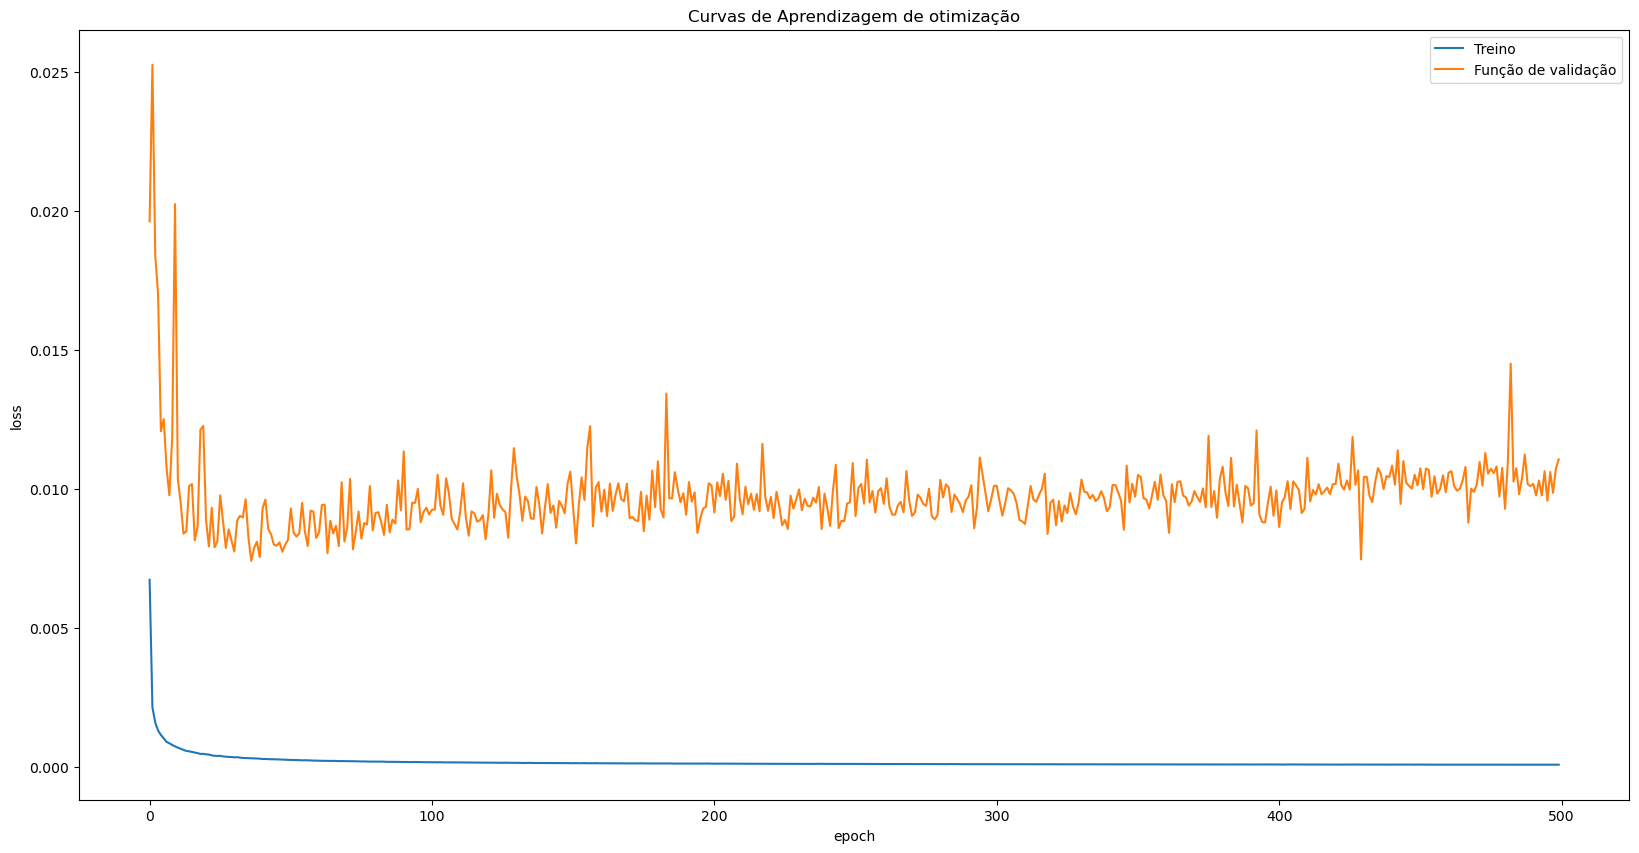

In [35]:
# plot train and validation loss
plt.figure(figsize=(20,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Curvas de Aprendizagem de otimização')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Treino', 'Função de validação'], loc='upper right')
plt.show()

In [36]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

 33/214 [===>..........................] - ETA: 0s  

2023-05-25 15:02:28.696834: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-25 15:02:28.698313: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-25 15:02:28.699511: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2/2 [==============================] - 0s 3ms/step
Train Score: 35.52 RMSE
Test Score: 17.75 RMSE


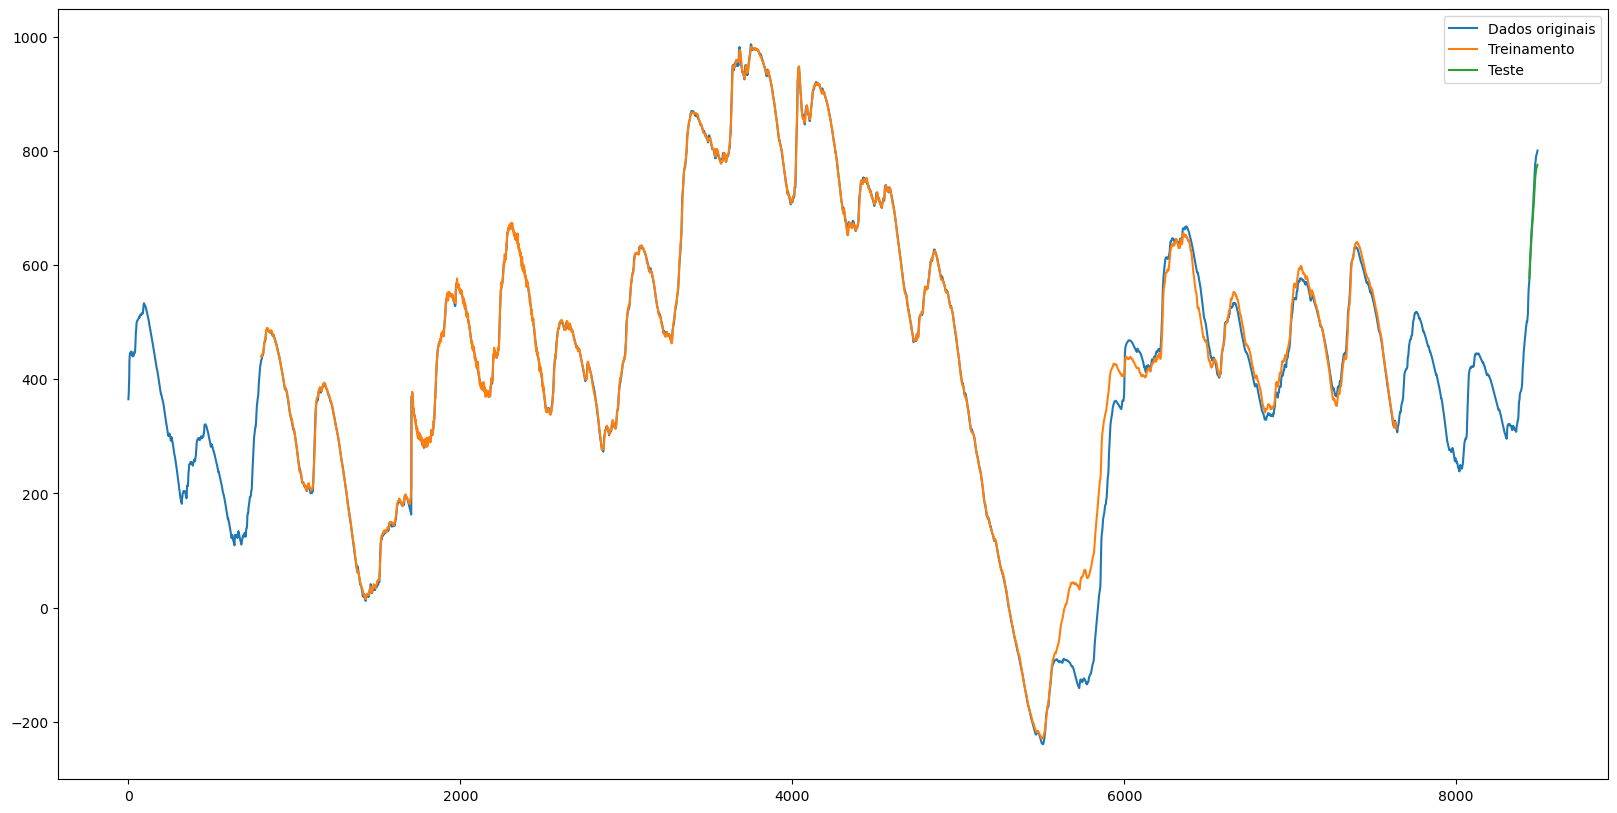

In [37]:
# shift train predictions for plotting
plt.figure(figsize=(20,10))
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset), label='Dados originais')
plt.plot(trainPredictPlot, label='Treinamento')
plt.plot(testPredictPlot, label='Teste')
plt.legend()
plt.show()

In [38]:
future_periods = 2000 # definição do número de passos futuros
last_sequence = testX[-1]

future_predictions = []
for _ in range(future_periods):
    last_sequence = np.reshape(last_sequence, (1, 1, look_back))
    next_prediction = model.predict(last_sequence)
    future_predictions.append(next_prediction[0, 0])
    last_sequence = np.concatenate((last_sequence[:, :, 1:], next_prediction.reshape(1, 1, 1)), axis=2)

# Inverter a escala das previsões futuras
future_predictions = scaler.inverse_transform([future_predictions])

# Exibir as previsões futuras
print("Previsões futuras:")
for i, prediction in enumerate(future_predictions[0]):
    print(f"Período {i+1}: {prediction}")

1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 17ms/step
Previsões futuras:
Período 1: 775.566864502816
Período 2: 771.3946445268007
Período 3: 767.4913513661675
Período 4: 763.367940821663
Período 5: 759.4828415958294
Período 6: 754.0120934579984
Período 7: 750.2280472917148
Período 8: 746.3139400654176
Período 9: 742.8695140153942
Período 10: 740.7030109480157
Período 11: 737.487945385286
Período 12: 734.697952977966
Período 13: 732.0865022561196
Período 14: 729.5177597868452
Período 15: 728.3338388006651
Período 16: 726.5816678910435
Período 17: 724.8777218688427
Período 18: 722.7778202937129
Período 19: 720.8492997389549
Período 20: 718.8001804316393
Período 21: 717.843866300483
Período 22: 716.8111960975772
Período 23: 715.738082750448
Período 24: 714.069026703616
Período 25: 713.2160672743639
Período 26: 711.9638642316767
Período 27: 711.4449352158247
Período 28: 711.0343295266412
Período 29: 711.2067700331761
Período 30: 710.9973936469576
Período 31: 709.6615277313964
Período 32: 707

In [1]:
# Calcular o erro do modelo nos dados de teste
test_predictions = model.predict(testX)
test_predictions = scaler.inverse_transform(test_predictions)
test_rmse = np.sqrt(np.mean((test_predictions - testY) ** 2))
print("Erro RMSE nos dados de teste:", test_rmse)

NameError: name 'model' is not defined

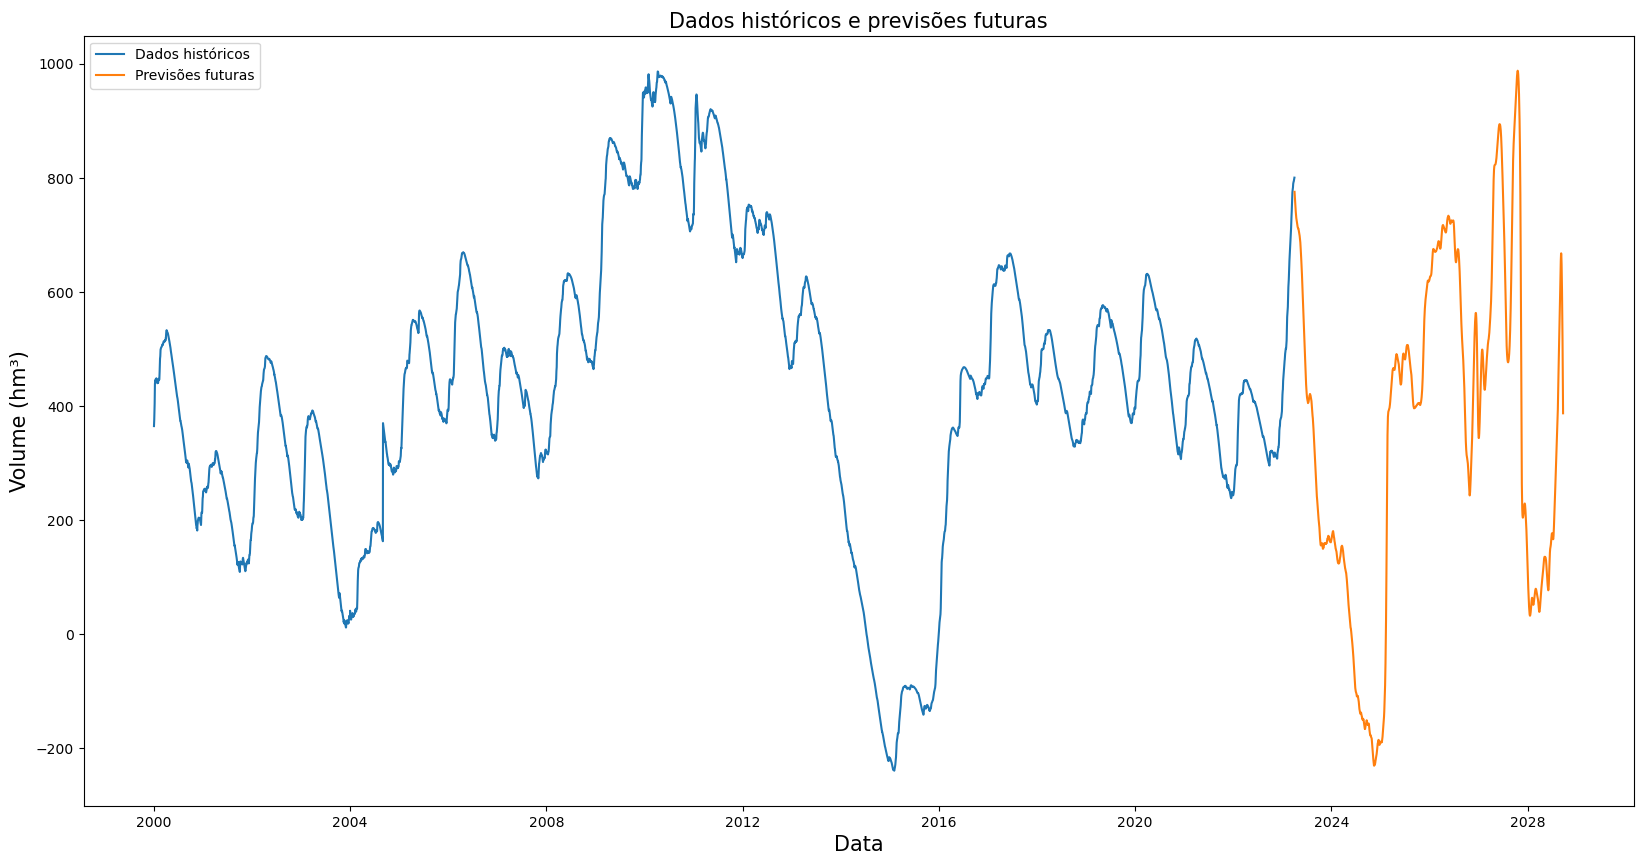

In [46]:
# Obter os índices das datas históricas
#dates = dfSabesp['Data'][:train_size+look_back]

# Criar os índices das datas futuras
#future_dates = pd.date_range(start=dates.iloc[-1], periods=future_periods+1)[1:]
future_dates = pd.date_range(start=dfSabesp['Data'].iloc[-1], periods=future_periods+1)[1:]

# Plotar os dados históricos e as previsões futuras
plt.figure(figsize=(20, 10))
#plt.plot(dates, dfSabesp['Volume (hm³)'][:train_size+look_back], label='Dados históricos')
#plt.plot(future_dates, np.concatenate([dfSabesp['Volume (hm³)'][train_size+look_back-1:], future_predictions.flatten()]), label='Previsões futuras')
plt.plot(dfSabesp['Data'], dfSabesp['Volume (hm³)'], label='Dados históricos')
plt.plot(future_dates, future_predictions.flatten(), label='Previsões futuras')
plt.xlabel('Data', fontsize = 15)
plt.ylabel('Volume (hm³)', fontsize = 15)
plt.title('Dados históricos e previsões futuras', fontsize = 15)
plt.legend()
plt.show()

#### Referências:  
<https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/>  
<http://surl.li/hfrzg>  
<https://didatica.tech/dados-de-treino-e-teste/>  
<https://runebook.dev/pt/docs/tensorflow/random/set_seed>  
https://keras.io/api/optimizers/  
https://machinelearningmastery.com/diagnose-overfitting-underfitting-lstm-models/  
https://www.tutorialspoint.com/keras/keras_model_compilation.htm  
https://machinelearningmastery.com/learning-curves-for-diagnosing-machine-learning-model-performance/  